In [34]:
df = pd.read_excel('MACDONALDS_FINAL_BALANCED_DATA.xlsx')
# Dataset was loaded locally during development.
# File upload code removed for clean presentation.

In [35]:
df.head(5)

,review,label
0,Making customers wait for more than half and h...,negative
1,I visited the McDonald’s Jogeshwari outlet yes...,negative
2,Pathetic system..ordered on mcdelievry app.. e...,negative
3,Service was very late… they were doing Timepas...,negative
4,Worst McDonald's takes alot to prepare the ord...,negative


In [36]:
print(df.shape)
print(df.dtypes)

(486, 2)
review    object
label     object
dtype: object


In [37]:
df.isnull().sum()

,0
review,0
label,0


In [38]:
df['label'].value_counts()

,count
label,
negative,243
positive,243


The goal of this project is to classify customer reviews into Positive or Negative sentiments using Natural Language Processing and Machine Learning techniques.


In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [40]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

x = tfidf.fit_transform(df['review'])
y = df['label']

max_features=5000

Keeps only top 5000 important words

Reduces overfitting

Improves speed

ngram_range=(1,2)

(1,1) → single words → good

(1,2) → single + two-word phrases → not good

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=42,stratify=y)

stratify=y Ensures train and test sets keep the same positive/negative class ratio as the original dataset.

In [42]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

max_iter=1000 Sets enough iterations for Logistic Regression to fully converge and avoid early stopping errors.

In [43]:
y_pred=logistic.predict(x_test)

In [44]:
acc_logistic=accuracy_score(y_test,y_pred)*100
print('Accuracy:',acc_logistic)

Accuracy: 96.93877551020408


In [45]:
confusion=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',confusion)

Confusion Matrix: [[48  1]
 [ 2 47]]


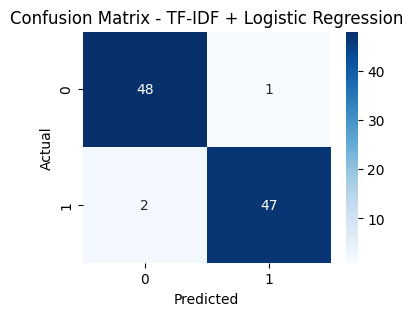

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = [[48, 1],
      [2, 47]]

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TF-IDF + Logistic Regression")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(logistic,x,y,cv=5)
print(scores)
print('mean accuracy:',scores.mean())

[0.98979592 0.97938144 0.97938144 0.98969072 0.98969072]
mean accuracy: 0.9855880496528509


used 5-fold cross-validation to check overfitting.
The accuracy across all folds was consistently around 98–99%, with very low variance.
This indicates that the model generalizes well and is not overfitting

In [48]:
def predict_review(review_text):
    review_vector = tfidf.transform([review_text])
    prediction = logistic.predict(review_vector)[0]
    probability = logistic.predict_proba(review_vector).max()
    return prediction, probability

In [49]:
test_reviews = [
    "The product quality is excellent and I am very satisfied with the purchase.",
    "Very poor quality, totally disappointed and not worth the money.",
    "Delivery was fast and the packaging was good, happy with the service.",
    "The product is not good and the customer support was very bad.",
    "Amazing experience, works perfectly and looks premium.",
    "I expected much better but the item stopped working after two days."
]

In [50]:
for review in test_reviews:
  label,prob=predict_review(review)
  print('\nReview:',review)
  print('prediction:',label)
  print('confidence:',round(prob*100,2),'%')


Review: The product quality is excellent and I am very satisfied with the purchase.
prediction: positive
confidence: 51.92 %

Review: Very poor quality, totally disappointed and not worth the money.
prediction: negative
confidence: 73.0 %

Review: Delivery was fast and the packaging was good, happy with the service.
prediction: positive
confidence: 75.11 %

Review: The product is not good and the customer support was very bad.
prediction: negative
confidence: 55.95 %

Review: Amazing experience, works perfectly and looks premium.
prediction: positive
confidence: 55.14 %

Review: I expected much better but the item stopped working after two days.
prediction: negative
confidence: 55.44 %


In [51]:
confusing_reviews = [
    "The product looks good but the quality is not great.",
    "It is okay, not bad but not very impressive either.",
    "I didn’t expect much, but it’s not terrible.",
    "Great job, it stopped working on the first day.",
    "If the price was lower, this would have been a good product.",
    "Customer support was helpful but the product itself is disappointing.",
    "It works, nothing special.",
    "Initially it seemed fine, later it turned out to be a bad decision."
]

In [52]:
for review in confusing_reviews:
  label,prob=predict_review(review)
  print('\nReview:',review)
  print('prediction:',label)
  print('confidence:',round(prob*100,2),'%')


Review: The product looks good but the quality is not great.
prediction: positive
confidence: 68.19 %

Review: It is okay, not bad but not very impressive either.
prediction: negative
confidence: 68.25 %

Review: I didn’t expect much, but it’s not terrible.
prediction: negative
confidence: 62.41 %

Review: Great job, it stopped working on the first day.
prediction: positive
confidence: 54.12 %

Review: If the price was lower, this would have been a good product.
prediction: positive
confidence: 52.68 %

Review: Customer support was helpful but the product itself is disappointing.
prediction: negative
confidence: 50.53 %

Review: It works, nothing special.
prediction: negative
confidence: 56.37 %

Review: Initially it seemed fine, later it turned out to be a bad decision.
prediction: negative
confidence: 66.27 %


TF-IDF with Logistic Regression did not perform well on confusing reviews because it relies on word frequency rather than sentence meaning. It cannot understand context, sarcasm, or mixed sentiment As a result, the model struggles when sentiment depends on word order or context

In [ ]:
import pandas as pd
from transformers import pipeline

Pipeline is a high-level API that combines tokenization, model prediction, and output processing into a single step.

Internally, it does ALL of this automatically:

Raw text
→ Tokenization
→ Convert tokens to numbers
→ Pass through Transformer model
→ Get prediction + confidence



In [ ]:
df=pd.read_excel('MACDONALDS_FINAL_BALANCED_DATA.xlsx')

In [ ]:
df['review'] = df['review'].astype(str).str.strip()

astype(str)
It converts every value in the review column into a string.

“It ensures all inputs are strings to avoid inference errors.”

In [ ]:
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

we loaded a pretrained DistilBERT transformer model that is already fine-tuned to classify text into positive or negative sentiment.

In [ ]:
texts = df['review'].tolist()

predictions = sentiment_model(texts)

Pipeline requires a Python list, not a Pandas Series. That is why we do tolist() to convert it into a pyhton list

In [ ]:
df['predicted_sentiment'] = [
    pred['label'].lower() for pred in predictions]

df['confidence_score'] = [
    pred['score']*100 for pred in predictions]

This stores the model’s predicted sentiment and confidence score for each review in the DataFrame.

In [ ]:
df[['review', 'predicted_sentiment', 'confidence_score']].head(10)

In [ ]:
confusing_reviews = [
    "The product looks good but the quality is not great.",
    "It is okay, not bad but not very impressive either.",
    "I didn’t expect much, but it’s not terrible.",
    "Great job, it stopped working on the first day.",
    "If the price was lower, this would have been a good product.",
    "Customer support was helpful but the product itself is disappointing.",
    "It works, nothing special.",
    "Initially it seemed fine, later it turned out to be a bad decision."
]

In [ ]:
results = sentiment_model(confusing_reviews)

for i in range(len(confusing_reviews)):
    review = confusing_reviews[i]
    prediction = results[i]['label']
    confidence = results[i]['score'] * 100

    print("Review:", review)
    print("Prediction:", prediction)
    print("Confidence:", round(confidence, 2), "%")
    print("-" * 50)

--- Model Comparison ---

    Model  Performance

0  Logistic Regression        96.93

1        Random Forest        96.94

2           DistilBERT        99.52
>>> BEST MODEL: DistilBERT <<<